# Final Project

### Content List:
#### -- Importing & viewing 4.9 data
#### -- Personally Identifiable Information (PII)
#### -- Creating a Regional Segmentation of Data
#### -- Creating an Exclusion Flag for low-activity customers
#### -- Creating a Customer Profile variable
#### -- Visualization to show Customer Profile distribution
#### -- Aggregate max, mean, min on a Customer Profile level
#### -- Compare Customer Profiles with Regions & Departments
#### -- Visualization: Orders by Department ID
#### -- Export

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
# path variable
# change to 'jsok' if using desktop
path = r'/Users/jsok/Instacart Basket Analysis'

In [3]:
# filter out warnings to clear up script
warnings.filterwarnings('ignore')

## 1. Importing & viewing data set from Exercise 4.9

In [4]:
# import project data from 4.9
ords_prods_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

In [5]:
# viewing the first 5 rows
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# checking information of 'ords_prods_all'
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int64   
 3   order_day_of_week       int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              object  
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                object  
 11  department_id           object  
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  Busiest_day             object  
 16  Busiest_days            object  
 17  Busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_order_price         float64 
 21  spendi

## 2. Personally identifiable information (PII data) which should be addressed are the columns 'first_name', 'last_name', 'gender', 'state', 'age', 'dependants', 'fam_status', and 'income'.  Consider removing unncessary information which could warrant privacy concerns, like customer names, age, and family status.

## 3. Create a regional segmentation of the data to compare customer behavior in different US Regions

In [7]:
# use transform function to generate max orders for each state
# new column: 'us_region'
ords_prods_all['us_region'] = ords_prods_all.groupby(['state'])['user_id'].transform(np.min)

In [8]:
# checking output - will change us_region below
ords_prods_all[['us_region','state']].head()

,us_region,state
0,1,Alabama
1,1,Alabama
2,1,Alabama
3,1,Alabama
4,1,Alabama


##### Create a flag that assigns a US Region label based on US states listed in Wikipedia source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [9]:
# us_region = Northeast
ords_prods_all.loc[(ords_prods_all['state'] == 'Maine') | (ords_prods_all['state'] == 'New Hampshire') | (ords_prods_all['state'] == 'Vermont') | (ords_prods_all['state'] == 'Massachusetts') | (ords_prods_all['state'] == 'Rhode Island') | (ords_prods_all['state'] == 'Connecticut') | (ords_prods_all['state'] == 'New York') | (ords_prods_all['state'] == 'New Jersey') | (ords_prods_all['state'] == 'Pennsylvania'), 'us_region'] = 'Northeast'

In [10]:
# us_region = Midwest
ords_prods_all.loc[(ords_prods_all['state'] == 'Wisconsin') | (ords_prods_all['state'] == 'Michigan') | (ords_prods_all['state'] == 'Illinois') | (ords_prods_all['state'] == 'Indiana') | (ords_prods_all['state'] == 'Ohio') | (ords_prods_all['state'] == 'North Dakota') | (ords_prods_all['state'] == 'South Dakota') | (ords_prods_all['state'] == 'Nebraska') | (ords_prods_all['state'] == 'Kansas') | (ords_prods_all['state'] == 'Minnesota') | (ords_prods_all['state'] == 'Iowa') | (ords_prods_all['state'] == 'Missouri'), 'us_region'] = 'Midwest'

In [11]:
# us_region = South
ords_prods_all.loc[(ords_prods_all['state'] == 'Delaware') | (ords_prods_all['state'] == 'Maryland') | (ords_prods_all['state'] == 'District of Columbia') | (ords_prods_all['state'] == 'Virginia') | (ords_prods_all['state'] == 'West Virginia') | (ords_prods_all['state'] == 'North Carolina') | (ords_prods_all['state'] == 'South Carolina') | (ords_prods_all['state'] == 'Georgia') | (ords_prods_all['state'] == 'Florida') | (ords_prods_all['state'] == 'Kentucky') | (ords_prods_all['state'] == 'Tennessee') | (ords_prods_all['state'] == 'Mississippi') | (ords_prods_all['state'] == 'Alabama') | (ords_prods_all['state'] == 'Oklahoma') | (ords_prods_all['state'] == 'Texas') | (ords_prods_all['state'] == 'Arkansas') | (ords_prods_all['state'] == 'Louisiana'), 'us_region'] = 'South'

In [12]:
# us_region = West
ords_prods_all.loc[(ords_prods_all['state'] == 'Idaho') | (ords_prods_all['state'] == 'Montana') | (ords_prods_all['state'] == 'Wyoming') | (ords_prods_all['state'] == 'Nevada') | (ords_prods_all['state'] == 'Utah') | (ords_prods_all['state'] == 'Colorado') | (ords_prods_all['state'] == 'Arizona') | (ords_prods_all['state'] == 'New Mexico') | (ords_prods_all['state'] == 'Alaska') | (ords_prods_all['state'] == 'Washington') | (ords_prods_all['state'] == 'Oregon') | (ords_prods_all['state'] == 'California') | (ords_prods_all['state'] == 'Hawaii'), 'us_region'] = 'West'

In [13]:
# checking the value counts of the new column
ords_prods_all['us_region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: us_region, dtype: int64

### crosstab with 'us_region' and 'spending_flag' 

In [14]:
# calculate high/low spender quantity per US Region
pd.crosstab(ords_prods_all['us_region'], ords_prods_all['spending_flag'], dropna = False)

spending_flag,High spender,Low spender
us_region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


#### While the number of states per 'us_region' vary by size, the US Regions have considerably different spending habits.  The South region has the most Instacart users and the most high spenders at over 40,000.  The West has the second most high spenders, followed by the Midwest  and Northeast region.  This is surprising, considering how the Northeast region has large densely populated cities.

## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [15]:
# for loop to label low-activity customers
# empty list
result = []

for x in ords_prods_all["max_order"]:
  if (x < 5):
    result.append("exclude")
  else:
    result.append("OK")

In [16]:
# assign result as new column 'exclusion_flag'
ords_prods_all['exclusion_flag'] = result

In [17]:
# count values 
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

OK         30964564
exclude     1440295
Name: exclusion_flag, dtype: int64

In [18]:
# new, updated subset to exclude the low-activity customers
ords_prods_all_new = ords_prods_all[~ords_prods_all['exclusion_flag'].isin(['exclude'])]

In [19]:
# count values in NEW dataframe to confirm
# EXPORT this dataframe at the end!!
ords_prods_all_new['exclusion_flag'].value_counts(dropna = False)

OK    30964564
Name: exclusion_flag, dtype: int64

## 5. Create a customer profile variable based on age, income, goods

## Detail customer profiling by...
#### income profile: low, middle, and upper class
#### age profile: younger, older
#### dependants profile: single, parent

In [20]:
# loc() if statement to detail customer profiling
#
# PROFILE 1 - low class, single young adult
ords_prods_all_new.loc[(ords_prods_all_new['income'] <= 67524) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Low class, Single Young Adult'

In [21]:
# PROFILE 2 - low class, young parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] <= 67524) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Low class, Young Parent'

In [22]:
# PROFILE 3 - low class, single adult (older)
ords_prods_all_new.loc[(ords_prods_all_new['income'] <= 67524) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Low class, Single Adult'

In [23]:
# PROFILE 4 - low class, older parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] <= 67524) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Low class, Older Parent'

In [24]:
# PROFILE 5 - middle class, single young adult
ords_prods_all_new.loc[(ords_prods_all_new['income'] > 67524) & (ords_prods_all_new['income'] < 128160) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Middle class, Single Young Adult'

In [25]:
# PROFILE 6 - middle class, young parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] > 67524) & (ords_prods_all_new['income'] < 128160) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Middle class, Young Parent'

In [26]:
# PROFILE 7 - middle class, single adult (older)
ords_prods_all_new.loc[(ords_prods_all_new['income'] > 67524) & (ords_prods_all_new['income'] < 128160) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Middle class, Single Adult'

In [27]:
# PROFILE 8 - middle class, older parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] > 67524) & (ords_prods_all_new['income'] < 128160) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Middle class, Older Parent'

In [28]:
# PROFILE 9 - upper class, single young adult
ords_prods_all_new.loc[(ords_prods_all_new['income'] >= 128160) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Upper class, Single Young Adult'

In [29]:
# PROFILE 10 - upper class, young parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] >= 128160) & (ords_prods_all_new['age'] <= 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Upper class, Young Parent'

In [30]:
# PROFILE 11 - upper class, single adult (older)
ords_prods_all_new.loc[(ords_prods_all_new['income'] >= 128160) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] == 0), 'cust_profile'] = 'Upper class, Single Adult'

In [31]:
# PROFILE 12 - upper class, older parent
ords_prods_all_new.loc[(ords_prods_all_new['income'] >= 128160) & (ords_prods_all_new['age'] > 49) & (ords_prods_all_new['dependants'] > 0), 'cust_profile'] = 'Upper class, Older Parent'

In [32]:
# checking the counts of the new column: 'cust_profile'
ords_prods_all_new['cust_profile'].value_counts(dropna = False)

Middle class, Young Parent          5974923
Middle class, Older Parent          5607239
Upper class, Older Parent           4418463
Low class, Young Parent             4330603
Middle class, Single Young Adult    1966159
Middle class, Single Adult          1880665
Low class, Older Parent             1525201
Upper class, Single Adult           1482980
Low class, Single Young Adult       1449877
Upper class, Young Parent           1368454
Low class, Single Adult              501727
Upper class, Single Young Adult      458273
Name: cust_profile, dtype: int64

## 6. Visualization to show the Customer Profile distribution

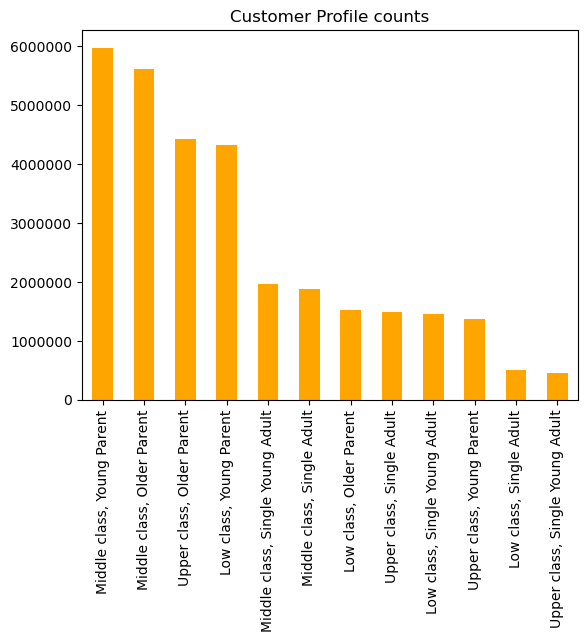

In [33]:
# create bar graph for customer profiles
bar_1 = ords_prods_all_new['cust_profile'].value_counts().plot.bar(color = ['orange'])

plt.title('Customer Profile counts') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### Most of Instacart customers are Middle class and/or parents.  The most popular type of customer is a Middle class, Young Parent.  Surprisingly, income level and age did not factor in as heavily as anticipated, but more on marital status (single vs. married).

## 7. Aggregate the max, mean, and min variables on a Customer Profile level for usage frequency and expenditure.

In [34]:
# aggregations on customer usage frequency 'days_since_prior_order'
ords_prods_all_new.groupby('cust_profile').agg({'days_since_prior_order':['min','mean','max']})

days_since_prior_order                 
                                                    min       mean   max
cust_profile                                                            
Low class, Older Parent                             0.0  11.090196  30.0
Low class, Single Adult                             0.0  10.976071  30.0
Low class, Single Young Adult                       0.0  10.970968  30.0
Low class, Young Parent                             0.0  10.908718  30.0
Middle class, Older Parent                          0.0  10.836851  30.0
Middle class, Single Adult                          0.0  10.687432  30.0
Middle class, Single Young Adult                    0.0  10.819424  30.0
Middle class, Young Parent                          0.0  10.695969  30.0
Upper class, Older Parent                           0.0  10.772561  30.0
Upper class, Single Adult                           0.0  10.673087  30.0
Upper class, Single Young Adult                     0.0  10.721910  30.0
Upper class, Young Parent                           0.0  10.804828  30.0

In [35]:
# aggregations on customer expenditure 'prices'
ords_prods_all_new.groupby('cust_profile').agg({'prices':['min','mean','max']})

prices                
                                    min      mean   max
cust_profile                                           
Low class, Older Parent            1.00  6.709356  25.0
Low class, Single Adult            1.00  6.721868  25.0
Low class, Single Young Adult      1.00  7.511903  25.0
Low class, Young Parent            1.00  7.514768  25.0
Middle class, Older Parent         0.99  7.954916  25.0
Middle class, Single Adult         0.99  7.962317  25.0
Middle class, Single Young Adult   0.99  7.953107  25.0
Middle class, Young Parent         0.99  7.954312  25.0
Upper class, Older Parent          0.99  7.955424  25.0
Upper class, Single Adult          0.99  7.940068  25.0
Upper class, Single Young Adult    0.99  7.922750  25.0
Upper class, Young Parent          0.99  7.936817  25.0

## 8. Compare Customer profiles with Regions & Departments

#### Regions

In [36]:
# subset of SOUTH region
df_south = ords_prods_all_new[ords_prods_all_new['us_region'] == 'South']

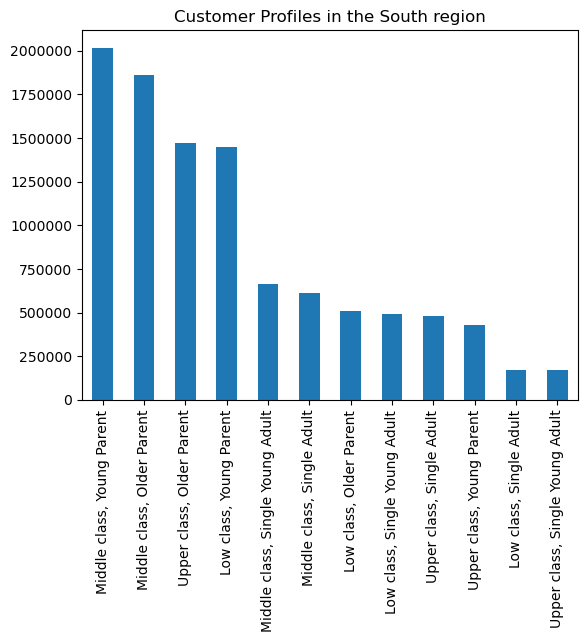

In [37]:
# bar chart of customer profiles in SOUTH region
bar_2 = df_south['cust_profile'].value_counts().plot.bar()

plt.title('Customer Profiles in the South region') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

In [38]:
# subset of WEST region
df_west = ords_prods_all_new[ords_prods_all_new['us_region'] == 'West']

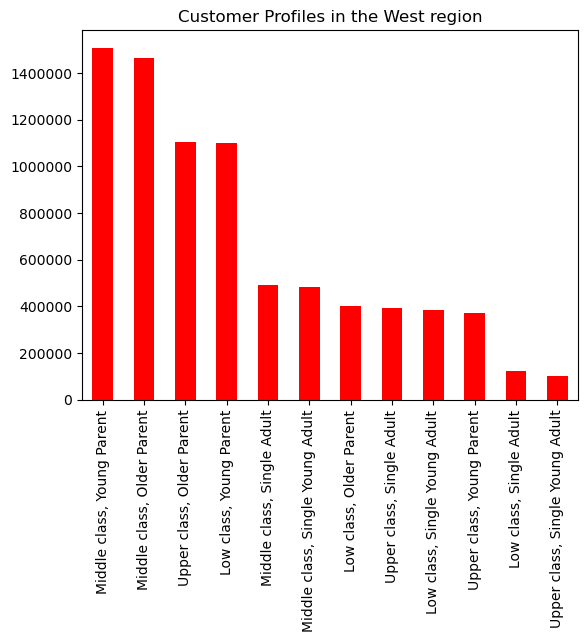

In [39]:
# bar chart of customer profiles in WEST region
bar_3 = df_west['cust_profile'].value_counts().plot.bar(color = ['red'])

plt.title('Customer Profiles in the West region') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

In [40]:
# subset of MIDWEST region
df_midwest = ords_prods_all_new[ords_prods_all_new['us_region'] == 'Midwest']

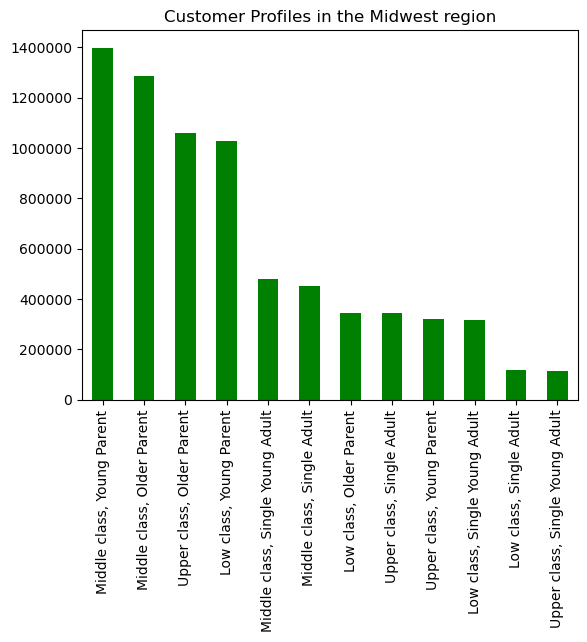

In [41]:
# bar chart of customer profiles in MIDWEST region
bar_4 = df_midwest['cust_profile'].value_counts().plot.bar(color = ['green'])

plt.title('Customer Profiles in the Midwest region') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

In [42]:
# subset of NORTHEAST region
df_northeast = ords_prods_all_new[ords_prods_all_new['us_region'] == 'Northeast']

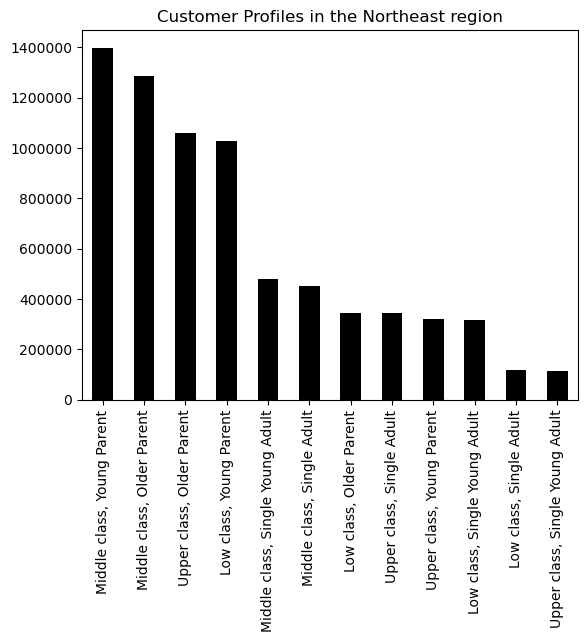

In [43]:
# bar chart of customer profiles in NORTHEAST region
bar_5 = df_midwest['cust_profile'].value_counts().plot.bar(color = ['black'])

plt.title('Customer Profiles in the Northeast region') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### Departments

In [44]:
# subset of FOOD AND DRINK departments
df_food_drink = ords_prods_all_new.loc[ords_prods_all_new['department_id'].isin(['1','3','4','5','7','9','12','14','15','16','19','20'])]

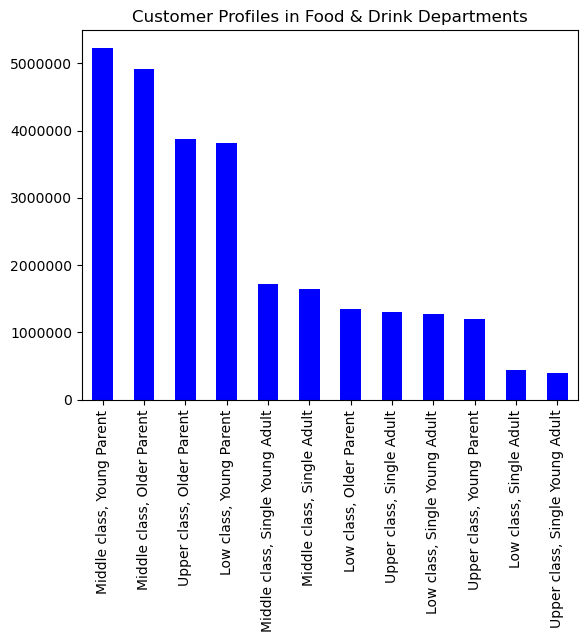

In [45]:
# bar chart of customer profiles in food and drink departments
bar_6 = df_food_drink['cust_profile'].value_counts().plot.bar(color = ['blue'])

plt.title('Customer Profiles in Food & Drink Departments') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

In [46]:
# subset of OTHER departments
df_other = ords_prods_all_new.loc[ords_prods_all_new['department_id'].isin(['2','6','8','10','11','13','17','18','21'])]

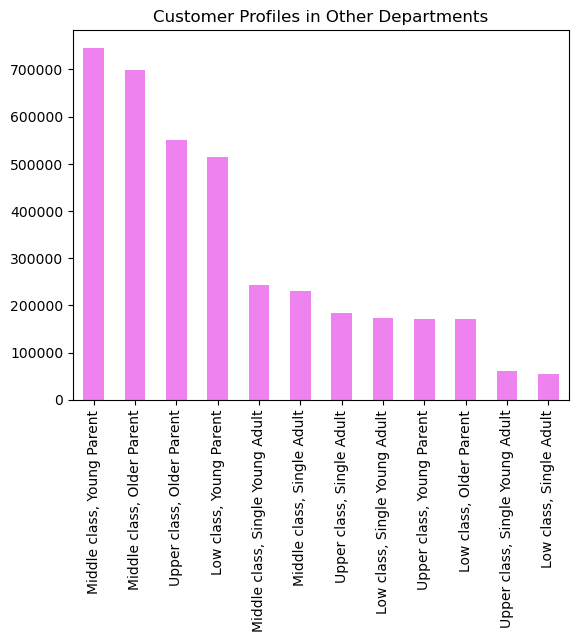

In [47]:
# bar chart of customer profiles in food and drink departments
bar_7 = df_other['cust_profile'].value_counts().plot.bar(color = ['violet'])

plt.title('Customer Profiles in Other Departments') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### Subset of US Regions and Instacart Departments were created.  However, the customer profiles all shop the same regardless of region and department - more specifically, the top 4 customer profiles, which make up majority of the customer base, remain the same across all bar graphs!
#### The top 4 customer profiles, in order: 
#### 1. Middle class, Young Parent
#### 2. Middle class, Older Parent
#### 3. Upper class, Older Parent
#### 4. Low class, Young Parent

## 9. Visualization: Orders by Department ID

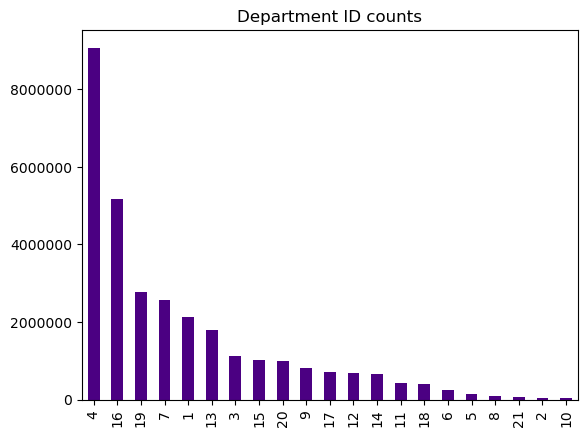

In [48]:
# create bar graph for departments
bar_8 = ords_prods_all_new['department_id'].value_counts().plot.bar(color = ['indigo'])

plt.title('Department ID counts') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### Produce and Dairy eggs departments lead the way!

## 10. Export

In [49]:
# Export 'ords_prods_all_new.pkl' 
ords_prods_all_new.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all_new.pkl'))

In [50]:
# Exporting visualiztions and saving as .png file
# bar_1: 
bar_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_profile_counts.png'))

In [51]:
# bar_2: 
bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_region_south.png'))

In [52]:
# bar_3: 
bar_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_region_west.png'))

In [53]:
# bar_4: 
bar_4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_region_midwest.png'))

In [54]:
# bar_5: 
bar_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_region_northeast.png'))

In [55]:
# bar_6: 
bar_6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_dep_food_drink.png'))

In [56]:
# bar_7: 
bar_7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','cust_dep_other.png'))

In [57]:
# bar_8: 
bar_8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_counts.png'))